# Laboratoire 1 : Extraction de primitives
#### Département du génie logiciel et des technologies de l’information

| Étudiants             | Alexandre Laroche - LARA12078907<br>Marc-Antoine Charland - CHAM16059609<br>Jonathan Croteau-Dicaire - CROJ10109402    |
|-----------------------|---------------------------------------------------------|
| Cours                 | GTI770 - Systèmes intelligents et apprentissage machine |
| Session               | Été 2019                                            |
| Groupe                | 02                                                      |
| Numéro du laboratoire | TP-01                                                   |
| Professeur            | Prof. Alessandro L. Koarich                             |
| Chargé de laboratoire | Pierre-Luc Delisle                                                     |
| Date                  | 29 mai 2019                                                    |

## Terminologie
<div style="text-align: justify">
Les termes Accuracy et Precision sont interchangeables lorsqu’ils sont traduits de l’anglais au français. Ainsi pour éviter toute confusion, voici les traductions utilisées dans ce rapport :
<br><br>
<b>Justesse</b> (en anglais; Accuracy)<br>
La justesse désigne le rapport entre le nombre de vraies prédictions sur le nombre de prédictions total. Ainsi, la justesse est la proportion de prédictions qui ont été prédites correctement.
<br><br>
<b>Précision</b> (en anglais; Precision)<br>
La précision désigne le rapport entre le nombre de vraies prédictions positives sur le nombre de prédictions positives. Ainsi, la précision est la proportion de prédictions positives qui ont été prédites correctement.</div>

## Question 1 - Introduction et revue de la littérature

<div style="text-align: justify">
La classification automatique de galaxies ne présente plus un problème aussi difficile qu’autrefois. En effet, le projet GalaxyZoo a permis d’étiqueter presque 900 000 images de galaxies en demandant la participation du public entre 2007 et 2009. Ainsi, ce projet a permis à une multitude de chercheurs en vision par ordinateur d’obtenir un ensemble de données massif pour conduire leurs recherches.
<br><br>
De ce fait, Shamir décrit en 2009 l’usage d’un algorithme afin de classer les images de galaxie de l’ensemble GalaxyZoo en spirale, elliptique ou sur le bord. Cet algorithme est l’algorithme de classification d’image multi-usage WND-CHARM. Celui-ci extrait 2873 primitives génériques des images entre autres par rapport aux niveaux de contrastes et aux textures. Ensuite, les images sont classées avec les primitives extraites et une règle du plus proche voisin. Enfin, à l’aide de l’algorithme WND-CHARM, Shamir a obtenu une précision d’environ 90 % lors de la classification. Néanmoins, cette façon de procéder aide seulement que légèrement à la compréhension des primitives qui permettent de distinguer les types de galaxies. En effet, [traduit] « certaines des primitives informatives sont hautement non-intuitives, comme la primitive de texture d’Haralick » (Shamir, 2009, p.3). En revanche, certaines études ont été plus fructueuses sur ce plan.
<br><br>
En effet, les auteurs de l’article Galaxy Morphology Classification ont déterminé par une analyse non supervisée que [traduit] « la luminosité et l’excentricité contiennent une fraction significative de la variation entre les galaxies » (Gauthier, Jain et Noordeh, 2016, p.5). Ceci est en partie en accord avec les résultats de Dhami en 2015. Celui-ci a conclu que les primitives les plus discriminantes concernent la couleur des galaxies et leur forme.
<br><br>
C’est sur les traces de ces recherches que le présent laboratoire débute. Ce laboratoire a pour objectif d’effectuer la classification automatique de galaxies selon leur morphologie dans les classes smooth et spirale. Pour se faire, un arbre de décision est utilisé pour classer les images des galaxies. Préalablement, des primitives doivent être extraites des images. Le choix de ces primitives est la difficulté majeure de ce laboratoire. Notamment, une multitude de primitives peuvent représenter un même aspect de la morphologie des galaxies. Par exemple, la forme d’une galaxie peut être décrite par son excentricité ou encore par le rapport entre sa hauteur et sa largeur. Or, toutes les primitives caractérisant un aspect ne sont pas aussi discriminantes. Le pouvoir discriminant des primitives doit être pris en compte dans le choix des primitives. En effet, ce pouvoir a une grande influence sur la précision de la classification. Ce choix est d'autant plus important puisque ces primitives seront utilisées lors des prochains laboratoires. 
<br><br>
Conformément à ce qui précède, ce rapport de laboratoire débute par justifier le choix des primitives. Par la suite, l’efficacité des deux primitives les plus discriminantes sera élucidée. Parallèlement, la performance de l’arbre de décision en considérant sa profondeur maximale sera analysée en détail. Enfin, une courte discussion portera sur d’autres primitives qui pourraient améliorer le pouvoir discriminant.
</div>

### Constants, variables et initialisation de matrices

Crop from middle:
https://stackoverflow.com/questions/16646183/crop-an-image-in-the-centre-using-pil

Grayscale:
https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python

Filters:
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

Gaussian Filter - Border Type:
https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/

Smoothing Images:
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

Image Thresholding:
https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html

JPG to FITS:
http://docs.astropy.org/en/stable/generated/examples/io/split-jpeg-to-fits.html

Change img Depth:
https://codeyarns.com/2015/08/27/depth-and-type-of-matrix-in-opencv/

Graphics and Tree
http://etetoolkit.org/ipython_notebook/



In [11]:

import os
import sys
import cv2
import math
import time
import random
import cv2 as cv
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
%matplotlib inline  
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np;np.random.seed(1)
from matplotlib import pyplot as plt
from scipy.stats.mstats import mquantiles
from astropy.visualization import (MinMaxInterval, SqrtStretch,ImageNormalize)


""""""""""""""""""
"   CONSTANTES   "
""""""""""""""""""

# Chemin du fichier CSV (galaxy - labels)
CSV_PATH = "./galaxy/galaxy_label_data_set.csv" 

# Répertoire des images (jpg) galaxy
IMG_PATH = "./galaxy/galaxy_images" 

# Constantes Matrices
IMG_QTY    = 5000
SMOOTH_QTY = IMG_QTY / 2
SPIRAL_QTY = IMG_QTY / 2 

# Constantes Images
IMG_HEIGHT  = 424  
IMG_WIDTH   = IMG_HEIGHT 
CROP_HEIGHT = 280
CROP_WIDTH  = CROP_HEIGHT

# Constantes Crop Circulaire
RADIUS = CROP_HEIGHT / 2

# Constantes Filtres (Kernel)
AVERAGE_KERNEL  = 10
GAUSSIAN_KERNEL = 7

# Constantes Bordures filtre Gaussien
BORDER_0 = 0  
BORDER_T = cv2.BORDER_TRANSPARENT 
BORDER_D = cv2.BORDER_DEFAULT  
BORDER_C = cv2.BORDER_CONSTANT 
BORDER_R = cv2.BORDER_REFLECT  
BORDER_W = cv2.BORDER_WRAP 

# Constantes autres
SMOOTH  = "smooth"
SPIRAL  = "spiral"
FORMAT  = ".jpg"
CLASS   = "class"
ID      = "id"


print("\n***************************************************************")
print("Initialization of Constants completed (", time.strftime("%d/%m/%Y"),"-", time.strftime("%H:%M:%S"),")")
print("***************************************************************\n")




***************************************************************
Initialization of Constants completed ( 29/05/2019 - 23:15:18 )
***************************************************************



### Fonctions de trairement d'image

In [12]:


"""""""""""""""""""""
"   BGR to RGB IMG  "
"""""""""""""""""""""
def bgr_2_rgb(img):
    
    """ Récupère les valeurs BGR et switch à RGB.
    
    Args:
        X:  Image OpenCV (BGR) de la matrice X. (ex: X[83])   
    Returns:
        Image de type RGB
    """    
    bgr_img = img / 255
    b,g,r = cv2.split(bgr_img)       
    rgb_img = cv2.merge([r,g,b])
    return rgb_img


"""""""""""""""""""""
"   RGB to BGR IMG  "
"""""""""""""""""""""
def rgb_2_bgr(img):
    
    """ Récupère les valeurs RGB et switch à BGR.
    
    Args:
        img:  OpenCV Image RGB   
    Returns:
        Image de type BGR
    """
    r,g,b = cv2.split(img)       
    img_bgr = cv2.merge([b,g,r])
    return img_bgr


"""""""""""""""""""""
"  IMG CENTER CROP  "
"""""""""""""""""""""
def center_crop(img, new_h=None, new_w=None):        
    
    """ Fonction qui recadre une image en son centre.
        Supporte aussi les images non carré.
    
    Args:
        img:   OpenCV Image RGB 
        new_h: La nouvelle hauteur de l'image
        new_w: La nouvelle largeur de l'image  
    Returns:
        Image recadrée en son centre avec la nouvelle hauteur et largeur
    """   
    h = img.shape[0]
    w = img.shape[1]
    if new_w is None: new_w = min(w,h)
    if new_h is None: new_h = min(w,h)

    l = int(np.ceil((w - new_w) / 2))      # Left
    r = w - int(np.floor((w - new_w) / 2)) # Right
    t = int(np.ceil((h - new_h) / 2))      # Top
    b = h - int(np.floor((h - new_h) / 2)) # Bottom

    if len(img.shape) == 2: img_crop = img[t:b,l:r]
    else: img_crop = img[t:b,l:r,...]
        
    return img_crop


"""""""""""""""""""""
"  IMG CIRCLE CROP  "
"""""""""""""""""""""
def circle_crop(img,r):

    """ Fonction qui applique un crop de forme circulaire au centre de l'image.
        On peinture en noir les pixels à l'extérieur du cercle de l'image.
    
    Args:
        img: OpenCV Image RGB
        r:   Rayon du cercle (crop)
    Returns:
        Image avec un crop de forme circulaire 
    """  
    img_circle = img.copy()
    c = (img.shape[0]/2) - r

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            c_y = math.pow(i-c-r,2)
            c_x = math.pow(j-c-r,2)
            d = math.sqrt(c_x + c_y)           
            if(d > r): img_circle[i][j] = [0,0,0]
                
    return img_circle


""""""""""""""""""""""""""
"  IMG AVERAGING FILTER  "
""""""""""""""""""""""""""
def averaging_filter(img, kernel):
    
    """ Fonction qui applique un filtre moyen sur les valeurs 
        des pixels de l'image dans une fenêtre (matrice) donnée.  
    
    Args:
        img:       OpenCV Image RGB
        kernel:    La taille de la matrice (kernel --> ex: 5 = matrice 5 x 5)   
    Returns:
        Image avec une moyenne appliquée sur la valeur de ses pixels
    """    
    k = np.ones((kernel, kernel), np.float32) / (kernel * kernel)
    img_average = cv2.filter2D(img, -1, k)
    return img_average


""""""""""""""""""""""""""
"   IMG GAUSSIAN FILTER  "
""""""""""""""""""""""""""
def gaussian_filter(img, mat_size, border_type):
    
    """ Fonction qui applique un filtre Gaussien sur les valeurs 
        des pixels de l'image dans une fenêtre (matrice) donnée et
        avec un type de bordure donnée.  
    
    Args:
        img:         OpenCV Image RGB
        mat_size:    La taille de la matrice. (ex: 5 = matrice 5 x 5)
        border_type: Le type bordure à appliquer (remplir).      
    Returns:
        Image avec un filtre Gaussien appliquée averc une bordure donnée
    """   
    gaussian_img = cv2.GaussianBlur(img, (mat_size, mat_size), border_type)
    return gaussian_img


""""""""""""""""""""""""""
"  IMG RGB TO GRAYSCALE  "
""""""""""""""""""""""""""
def rgb_2_gray(img):
    
    """ Fonction qui converti une image RGB vers une palette grise. 
    
    Args:
        img: OpenCV Image RGB   
    Returns:
        Image sur une palette grise
    """
    #return cv2.cvtColor(img.astype("uint8"), cv2.COLOR_BGR2GRAY)
    gray_img = np.mean(img, -1)
    return gray_img

def preprocess_img(img):
    """ 
    Effectue tous les prétraitement sur l'image donnée.

    Args:
        img: L'image à prétraiter
    Returns:
        L'image prétraitée
    """
    img = gaussian_filter(img, GAUSSIAN_KERNEL, BORDER_W)
    img = center_crop(img, CROP_HEIGHT, CROP_WIDTH)
    img = circle_crop(img, RADIUS)
    return img

print("\n***************************************************************")
print("Initialization of functions completed (", time.strftime("%d/%m/%Y"),"-", time.strftime("%H:%M:%S"),")")
print("***************************************************************\n")


***************************************************************
Initialization of functions completed ( 29/05/2019 - 23:15:20 )
***************************************************************



### Chargement des données

In [13]:

"""""""""""""""""""""
"   DATA INSERTION  "
"""""""""""""""""""""

# Initialise les matrices X (images) et Y (labels)
X = []
Y = []

smooth_count = 0
spiral_count = 0
img_count    = 0

# Verifie l'existence du fichier CSV
if not os.path.isfile(CSV_PATH): sys.exit() 
    
# Ouverture et lecture du fichier CSV
csv_file = open(CSV_PATH, "r")

# Parcours le fichier CSV ligne par ligne
for i in csv_file :
    
    # Récupère les valeurs de la colonne "id" et de la colonne "class" du fichier CSV
    img_id, img_class = i.split(",")
    
    # Pour sauter la premiere ligne (titres) du fichier CSV
    if img_id == ID or img_class == CLASS :
        continue
        
    # Limite la quantité d'insertion images "Smooth"
    if SMOOTH in img_class and smooth_count < SMOOTH_QTY : 
        
        # Construction du chemin vers l'image 
        smooth_path = IMG_PATH + "/" + img_id + FORMAT
        if not os.path.isfile(smooth_path): continue
        
        # Insertion de l'image dans la matrice à une position donnée
        img = preprocess_img(cv2.imread(smooth_path))
        X.append(img)
        Y.append(SMOOTH)
        smooth_count += 1
        img_count += 1
   
    # Limite la quantité d'insertion images "Spiral"
    if SPIRAL in img_class and spiral_count < SPIRAL_QTY : 
        
        # Construction du chemin vers l'image 
        spiral_path = IMG_PATH + "/" + img_id + FORMAT
        if not os.path.isfile(spiral_path): continue
        
        # Insertion de l'image dans la matrice à une position donnée
        img = preprocess_img(cv2.imread(spiral_path))
        X.append(img)
        Y.append(SPIRAL)
        spiral_count += 1
        img_count += 1

    # Met fin à la lecture du fichier CSV si les quantités d'images sont atteintes
    if img_count == IMG_QTY :
        if smooth_count == SMOOTH_QTY and spiral_count == SPIRAL_QTY :
            csv_file.close()
            break
        else: sys.exit()

X = np.array(X)
Y = np.array(Y)

print("\n*******************************************************")
print("Image data insertion completed (", time.strftime("%d/%m/%Y"),"-", time.strftime("%H:%M:%S"),")")
print("********************************************************\n")

print('Loaded image count :  ',img_count)
print('Loaded Smooth count : ',smooth_count)
print('Loaded Spiral count : ',spiral_count)



*******************************************************
Image data insertion completed ( 29/05/2019 - 23:21:36 )
********************************************************

Loaded image count :   5000
Loaded Smooth count :  2500
Loaded Spiral count :  2500


## Question 2
<div style="text-align: justify">
Les primitives utilisées par cet algorithme ont été choisies après une lecture de la littérature portant sur la classification automatique des galaxies et sur la morphologie de celles-ci. Les articles qui ont principalement été consultés sont les 7 articles fournis pour ce laboratoire. D’autres articles concernant la morphologie des galaxies ont été consultés pour aider à la compréhension des distinctions entre les types de galaxie. La lecture de la littérature a été effectuée en prenant en compte les contraintes de ce laboratoire. En particulier, une plus grande attention a été portée envers les articles qui présentent des primitives spécifiques à ce problème. Au contraire, moins d’attention a été portée aux articles qui décrivent une approche utilisant des primitives génériques en classification d’images ou encore des algorithmes de détection de primitives. Cette orientation a été prise puisqu’au terme de ce laboratoire nous ne disposons pas du temps nécessaire pour comprendre les primitives complexes génériques, ni le temps d’apprendre à utiliser les algorithmes de détection de primitives. En ce faisant, cette lecture a permis de prendre compte des principaux aspects morphologiques des galaxies qui peuvent être décrits par une primitive discriminante.
<br><br>
À cet égard, les résultats de Gauthier, Jain et Noordeh (2016), Dhami (2015), et Ferrari, de Carvalho et Trevisan (2015) montrent que les primitives les plus discriminantes utilisées dans leurs études concernent la forme, la luminosité, et la couleur des galaxies. Suite à cette prise de conscience, les membres de l’équipe ont effectué des recherches dans la littérature pour savoir s’il y a une relation entre ces aspects morphologiques. À première vue une relation semble être présente entre certains de ces aspects. Par exemple, Bell et al. (2004) ont démontré une relation entre la luminosité et la masse des galaxies. C’est publiquement connu que les galaxies de couleurs différentes ont aussi une masse différente et sont formées d’étoiles qui sont à des étapes différentes de leurs vie. Cependant, cette recherche dans la littérature n’a pas été fructifiant. La compréhension apportée par celle-ci n’a pas permis de mieux justifier le choix des primitives. De ce fait, les primitives ont été choisies en considérant seulement les articles fournis pour ce laboratoire.
<br><br>
En effet, des primitives ont été choisies pour chacun des trois aspects morphologiques présentés plus tôt. Ainsi, l’excentricité et la circularité sont les primitives choisies pour représenter la forme. La primitive de l’excentricité est proposée par Gauthier, Jain et Noordeh (2016). L’excentricité exprime si une forme est plus un cercle ou une ellipse. L’excentricité est définie comme :</div>
$$e = \sqrt{1 - \frac{b^{2}}{a^{2}}}$$

où un cercle à une excentricité de 0 et une ellipse une excentricité entre 0 et 1 exclusivement.<br><br>
<div style="text-align: justify">
Parallèlement, Dhami (2015) propose d’utiliser le rapport de la hauteur sur la largeur. Ce dernier rapport pourrait être une primitive qui caractérise la forme de la galaxie. Cependant, ce rapport ne prend pas en compte la position des foyers de l’ellipse comme le fait l’excentricité. Puisque l'excentricité inclut dans sa définition ce même rapport, utiliser ce rapport ainsi que l'excentricité comme primitive semble redondant. De ce fait, ce rapport n’est pas utilisé comme primitive dans l’algorithme présenté. Seulement, des tests devraient être effectués pour déterminer si inclure la primitive du rapport de la hauteur sur la largeur améliore la performance de l’arbre de décision.
<br><br>
En ce qui concerne la circularité, la définition choisie pour cette primitive est celle de Žunić et Hirota (2008). Cette définition est une amélioration face à une autre définition bien connue. Pour éviter toute confusion, cette autre définition de la circularité sera référée par compacité, dans le reste du rapport. De ce fait, selon Žunić et Hirota : « Probably the most standard circularity measure (sometimes also called the compactness)  is derived from the relation between the shape area and its perimeter » (Žunić et Hirota, 2008, p.94). Ainsi, la compacité est définie par l'équation :</div>
$$C = 4*\pi * \frac{A}{P^{2}}$$
où A est l’aire de la forme et P son périmètre.
<br><br>
<div style="text-align: justify">
La compacité est entre autres présentée par Dhami (2015) comme une primitive pour la circularité. Pour leur part, Žunić et Hirota font usage de la notion de probabilité des moments centrés :</div>
$$C(S) = \frac{1}{2\pi} * \frac{(\mu_{0,0}(S))^2}{\mu_{2,0}(S)+\mu_{0,2}(S)}$$
$$\mu_{p,q}=\sum_{x}\sum_{y}(x-\frac{M_{10}}{M_{00}})^{p}\thinspace(y-\frac{M_{01}}{M_{00}})^{q}$$
$$M_{i,j}=\sum_{x}\sum_{y}x^{i}y^{j}I(x,y)$$
où $I(x,y)$ est l’intensité des pixels d’une image en nuances de gris.
<br><br>
<div style="text-align: justify">
La centralité donne une mesure entre [0, 1] où 1 est un cercle parfait. Cette définition de la circularité a été choisie face à la compacité puisqu’elle est robuste au bruit. De plus, la compacité [traduit] « pénalise les intrusions profondes dans la forme. De telles intrusions et protrusion mènent à une augmentation du périmètre, et en conséquence, impliquent une mesure de [compacité] plus basse » (Žunić et Hirota, 2008, p.98). La circularité n'a pas ce problème. Enfin, la circularité [traduit] « est invariante avec respect aux translations, rotations, et changement d’échelle » (Žunić et Hirota, 2008, p.100).
<br><br>
Ensuite, la suggestion de Gauthier, Jain et Noordeh (2016) pour la primitive de la luminosité a été choisie. Ainsi, cette primitive est la somme des valeurs des pixels de l’image. Enfin, la primitive choisie pour caractériser la couleur est le ratio de l’intensité du rouge sur celle du bleu tel que suggéré par Dhami (2015).
</div>

### Fonctions d'extraction des primitives

In [15]:

""""""""""""""""""""""""""
"  IMG TOTAL BRIGHTNESS  "
""""""""""""""""""""""""""
def get_image_brightness(img) :
    
    """ Fonction qui retourne la luminosité d'une image,
        donc la somme de toutes les valeurs de ses pixels
    
    Args:
        img: L'image couleur (3 channels) pour laquelle la luminausitée est calculée       
    Returns:
        La somme de tous les pixel composant l'image
    """
    return np.sum(img)
    
"""""""""""""""""""""""""""
"  IMG RED TO BLUE RATIO  "
"""""""""""""""""""""""""""
def get_image_red_to_blue_ratio(rgb_img) :
    
    """ Fonction qui retourne le ratio red to blue d'une image
    
    Args:
        rgb_img: L'image en format RGB pour laquelle le ratio red to blue est calculé       
    Returns:
        Le ratio entre le red et le blue de l'image
    """
    red_sum = 0
    blue_sum = 0
    
    for row in rgb_img :
        for pixel in row :
            red_sum += pixel[0]
            blue_sum += pixel[2]
    
    return red_sum / blue_sum

""""""""""""""""""
"  Eccentricity  "
""""""""""""""""""
def get_img_eccentricity(bgr_img, show_image) :
    
    """ Fonction qui retourne l'excentricité d'une galaxy
    
    Args:
        bgr_img:    Image en format BGR pour laquelle l'excentricité est calculé
        show_image: Show debug image        
    Returns:
        L'excentricité d'une galaxy
    """
    #Transforme les images en niveau de gris
    new_image = bgr_img.astype(np.uint8)
    gray = cv.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    
    #Crée une image binaire
    ret,th = cv2.threshold(gray,50,255, 0)
    #ret,th = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    #Trouve les contours dans cette image binaire
    _, contours,hierarchy = cv2.findContours(th,2,1)
    cnt = contours
    
    #affiche l'original et les contours si show_image est vrai
    if show_image :
        f, axarr = plt.subplots(1,2, figsize=(10, 10))
        axarr[0].set_title("Original")
        axarr[1].set_title("Contour")
        axarr[0].imshow(bgr_img / 255)
        axarr[1].imshow(cv2.drawContours(new_image, cnt, -1, (0,255,0), 3) / 255)
        plt.show()
    
    #Trouve le contour qui produit l'ellipse la plus proche du centre
    center_ellipse = []
    min_distance_from_center = 99999
    for i in cnt :
        #On ne peut pas crée d'elipse si le contour fait moins de 5 point
        if i.shape[0] < 5 :
            continue
        ellipse = cv2.fitEllipse(i)
        ellipse_x = ellipse[0][0]
        ellipse_y = ellipse[0][1]
        image_x_center = new_image.shape[0] / 2
        image_y_center = new_image.shape[1] / 2
        distance_from_center = math.sqrt((image_x_center - ellipse_x)**2 + (image_y_center - ellipse_y)**2)
        if distance_from_center < min_distance_from_center :
            min_distance_from_center = distance_from_center
            center_ellipse = ellipse
    
    #Affiche l'image des contours et celle de l'elipse choisi si show_image est vrai
    if show_image :
        ellipse_image = bgr_img.copy()
        cv2.ellipse(ellipse_image, center_ellipse, (255,0,0), 2)
        f, axarr = plt.subplots(1,2, figsize=(10, 10))
        axarr[0].set_title("Contour")
        axarr[1].set_title("Ellipse")
        axarr[0].imshow(cv2.drawContours(new_image, cnt, -1, (0,255,0), 3) / 255)
        axarr[1].imshow(cv2.ellipse(ellipse_image, center_ellipse, (255,0,0), 2) / 255)
        plt.show()
    
    #calcul l'excentricité
    (x, y), (MA, ma), angle = center_ellipse
    a = ma/2
    b = MA/2
    eccentricity = math.sqrt(1- (pow(b, 2)/pow(a, 2)))
    
    return eccentricity

""""""""""""""""""
"   CIRCULARITY  "
""""""""""""""""""
def get_img_circularity(bgr_img):
    
    """
    Calcule la circularité de l'image selon la définition de la circularité de Zunic et Hirota dans
    
    Žunić J., Hirota K. (2008) Measuring Shape Circularity. In: Ruiz-Shulcloper J., Kropatsch W.G. (eds)
    Progress in Pattern Recognition, Image Analysis and Applications. CIARP 2008. Lecture Notes in 
    Computer Science, vol 5197. Springer, Berlin, Heidelberg
    
    Args:
        bgr_img: Image en format BGR pour laquelle on désire calculer la circularité.       
    Returns:
        La circularité de l'image
    """
    
    gray_img = cv.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
    ret, th = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    moments = cv2.moments(th, binaryImage=True)
    circularity = (1.0 / (2.0*math.pi)) * (math.pow(moments['m00'], 2) / (moments['mu20'] + moments['mu02']))
    
    return circularity
    

print("\n**************************************************************************")
print("Initialization of primitives functions completed (", time.strftime("%d/%m/%Y"),"-", time.strftime("%H:%M:%S"),")")
print("**************************************************************************\n")


**************************************************************************
Initialization of primitives functions completed ( 29/05/2019 - 23:21:56 )
**************************************************************************



### Extraction des primitives

In [16]:

# Array contenant les 4 type de primitives
feature_vector = []

for i in range(len(X)):
    
    bgr_img = X[i]
    rbg_img = cv.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    
    # Insertitions des données des primitives 
    feature_vector.append([
        get_image_brightness(bgr_img),
        get_image_red_to_blue_ratio(rbg_img),
        get_img_eccentricity(bgr_img, False),
        get_img_circularity(bgr_img)
    ])


print("\n**********************************************************************************")
print("Data extraction of the four type of primitives completed (", time.strftime("%d/%m/%Y"),"-", time.strftime("%H:%M:%S"),")")
print("**********************************************************************************\n")   


**********************************************************************************
Data extraction of the four type of primitives completed ( 29/05/2019 - 23:24:34 )
**********************************************************************************



In [17]:

        
def feature_samples(arr,p):

    sm_count = 0
    sp_count = 0
    size = len(arr)
    
    # Trois taille d'échantillon par type de classe.
    small_size  = int(size/8) # 5000 / 8 = 625  échantillons
    medium_size = int(size/4) # 5000 / 4 = 1250 échantillons 
    large_size  = int(size/2) # 5000 / 2 = 2500 échantillons 
    
    # Étiqueter les données avec la taille du sample pour obtenir 3 graphiques. 
    small  = str(small_size)
    medium = str(medium_size)
    large  = str(large_size)
    
    # Array qui contient les informations de la primitive [data,class,sample qty.]
    sample_array = [[],[],[]]

    # Loop autour de toutes les images  (5000)
    for i in range(len(arr)):
        
        # Si c'est une image de type "Smooth" 
        if SMOOTH in Y[i] and sm_count < large_size:
            
            # 625 (1/8) samples de type Smooth 
            if sm_count < small_size :
                sample_array[0].append(arr[i][p])
                sample_array[1].append(Y[i])
                sample_array[2].append(small)
                
            # 1250 (1/4) samples de type Smooth     
            if sm_count < medium_size :
                sample_array[0].append(arr[i][p])
                sample_array[1].append(Y[i])
                sample_array[2].append(medium)
            
            # 2500 (1/2) samples de type Smooth 
            sample_array[0].append(arr[i][p])
            sample_array[1].append(Y[i])
            sample_array[2].append(large)            
            sm_count = sm_count + 1
    
        # Si c'est une image de type "Spiral" 
        if SPIRAL in Y[i] and sp_count < large_size:
            
            # 625 (1/8) samples de type Spiral
            if sp_count < small_size :
                sample_array[0].append(arr[i][p])
                sample_array[1].append(Y[i])
                sample_array[2].append(small)
            
            # 1250 (1/4) samples de type Spiral
            if sp_count < medium_size :
                sample_array[0].append(arr[i][p])
                sample_array[1].append(Y[i])
                sample_array[2].append(medium)
             
            # 2500 (1/2) samples de type Spiral
            sample_array[0].append(arr[i][p])
            sample_array[1].append(Y[i])
            sample_array[2].append(large)            
            sp_count = sp_count + 1

        # Si on a passé au travers de toutes les données
        if i >= len(arr)-1 and sm_count >= large_size and sp_count >= large_size: 
            return sample_array


def display_efficiency(matrix,primitive):

    # Construction de la structure du graphique 
    sns.set(style="whitegrid", font_scale=1.5)
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True, 
                             gridspec_kw=dict(height_ratios=(1, 2), hspace=0.2))

    # Paramètres du graphiques avec barres verticales
    sns.barplot(
        data=matrix, 
        x="Sample", 
        y=primitive, 
        hue="Galaxy", 
        ax=axes[0])

    # Paramètres du graphique de style violon
    sns.violinplot(
        x="Sample", 
        y= primitive, 
        hue="Galaxy", 
        data=matrix, 
        split=True, 
        scale="count", 
        scale_hue=False, 
        inner="quartile",
        ax=axes[1])

    axes[0].set_xlabel("Ratio")
    axes[0].legend("")
    
    axes[1].set_xticklabels(["625", "1250", "2500"])
    axes[1].set_xlabel("Nombre d'échantillons par classe")
    axes[1].legend("")

    # Sortir la légende à l'extérieur des graphiques
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


print("\n********************************************************************************")
print("Initialization of sample arrays and graphics completed (", time.strftime("%d/%m/%Y"),"-", time.strftime("%H:%M:%S"),")")
print("********************************************************************************\n")


********************************************************************************
Initialization of sample arrays and graphics completed ( 29/05/2019 - 23:24:46 )
********************************************************************************



## Question 3

##### 3.1.1 - Efficacité par analyse de la luminausité


Avant de discuter de l'efficacité de la primitive portant sur l'analyse par niveau de luminosité, il faut noter que les images de type smooth ont visuellement une luminosité décroissante et très linéaire en s'éloignant de son centre. À l'inverse, les images de type spiral n'ont pas vraiment une luminosité linéaire et décroissante en s'éloignant de son centre. En effet, la pluspart des galaxies de type spiral ont une grande quantité de points lumineux situés dans le tourbillon de celles-ci. 

Maintenant que les constatations visuelles à haut niveau ont été faites, il est désormais temps de les comparer avec les résultats obtenus. En regardant de près les graphiques ci-dessous, les valeurs du niveau d'éclairage des images de type smooth sont beaucoup plus réparties sur toute la longueur que celles des images de type spiral. La répartition des valeurs de la galaxie smooth fait penser aux caractéristiques typiques de celles-ci avec une luminosité décroissante et linéaire. Pour le résultat des galaxies de type spiral, la somme des points lumineux retrouvés dans le tourbillon d'une spirale fait beaucoup augmenter le niveau d'éclairage total. Cela a comme effet de rendre plus difficile la reconnaissance d'une image de type spiral face à une image de type smooth ayant un niveau d'éclairage situé entre 0.1 et 0.3 de l'axe des ordonnées (y:brightness) du graphique.

Dans le même ordre d'idées, les graphiques ci-dessous montrent qu'une ligne séparatrice pourrait être placée à un niveau d'éclairage de 0,6 sur l'axe des ordonnées (y:brightness). Malgré l'évolution de la quantité d'échantillons, le niveau identifié à 0,6 pour la ligne séparatrice ne change pas. 


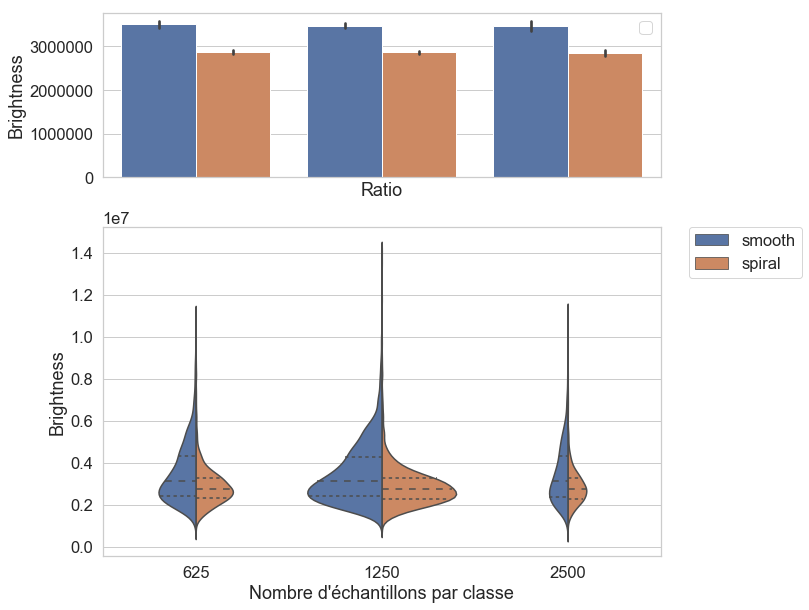

In [18]:
brightness = feature_samples(feature_vector,0)
display_efficiency(pd.DataFrame.from_dict({'Brightness':brightness[0],
                                           'Galaxy':brightness[1],
                                           'Sample':brightness[2]}),
                                           "Brightness")

##### 3.1.2 - Efficacité par analyse du ratio entre bleu et rouge

Pour ce qui est de la primitive du ratio entre pixels bleu et rouge des classes de galaxies, il évident que le ratio pour les images de type smooth est beaucoup plus élevé que celle des images de type spiral. Aussi, il pourrait être soulevé que les galaxies smooth atteignent des ratios avec des valeurs maximales beaucoup plus élevées que celles des galaxies spirales. À l'inverse, les galaxies spirales atteignent des ratios avec des valeurs minimales beaucoup plus basses que celles des galaxies smooth. En d'autres mots, les types de classes sont proportionnellement inverses. 

Dans le même ordre d'idées, malgré la similarité des ratios pour les images de type smooth (entre 1.5 et 2.0) ainsi que des images de type spiral (entre 1.0 et 1.5), il va de soi que la médiane (ligne pointillée principale) observée dans les graphiques vient grandement appuyer la primitive sur sa capacité à être efficace en terme de discrimance entre les classes. 


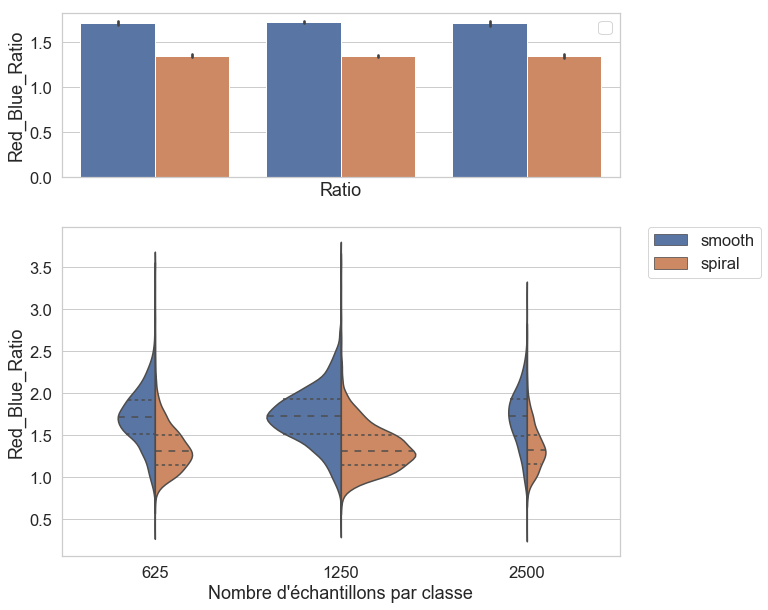

In [19]:
red_blue_ratio = feature_samples(feature_vector,1)
display_efficiency(pd.DataFrame.from_dict({'Red_Blue_Ratio':red_blue_ratio[0],
                                           'Galaxy':red_blue_ratio[1],
                                           'Sample':red_blue_ratio[2]}),
                                           'Red_Blue_Ratio')

##### 3.1.3 - Efficacité par analyse de l'excentricité

Dans le cas présent, les résultats obtenus avec l'utilisation de l'excentricité permettent de rapidement observer que les images de type spiral ont une excentricité beaucoup plus élevée que celles des images de type smooth. La grande différence entre  la médiane (ligne pointillée principale) observée pour les galaxies spirales et galaxies smooth dans les graphiques ci-dessous met à la lumière la capacité de cette primitive à avoir un pouvoir discriminant efficace. Les deux classes de galaxies ont une certaine similarité due au bruit des images, mais le niveau plus élevé de l'excentricité pour les images de type spiral est assez imposant pour constater la différence. 


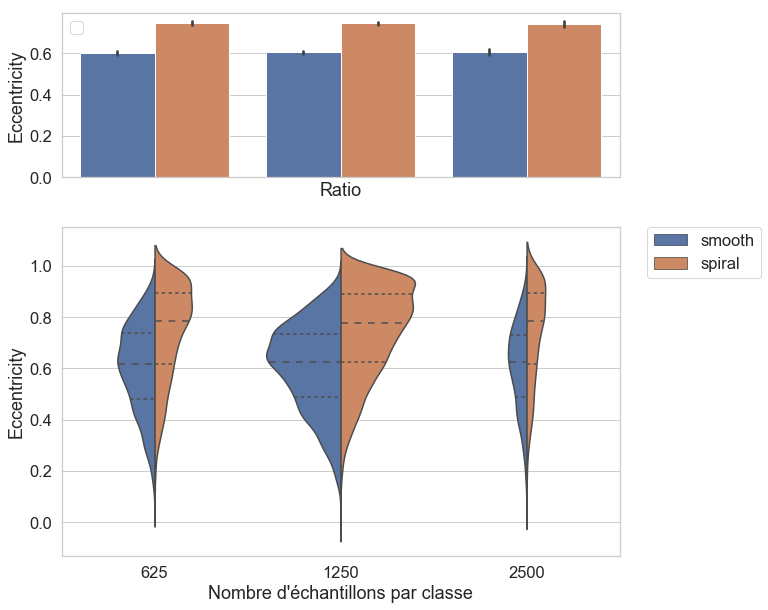

In [23]:
eccentricity = feature_samples(feature_vector,2)
display_efficiency(pd.DataFrame.from_dict({'Eccentricity':eccentricity[0],
                                           'Galaxy':eccentricity[1],
                                           'Sample':eccentricity[2]}),
                                           "Eccentricity")

##### 3.1.4 - Efficacité par analyse de la circularité

Avec une comparaison visuelle entre une image de type smooth et une image de type spiral, il n'est pas difficile d'avoir comme premier réflex d'assumer que l'analyse par niveau de circularité est assez discriminante pour permettre aux algorithmes de bien identifier les deux types de galaxies. En effet, les variations de la forme d'une galaxie de type spiral sont normalement très évidentes, et ce, même si l'orientation de celle-ci n'est pas idéale.   

Cependant, l'analyse du niveau de circularité ainsi que les résultats obtenus permettent de dire que pour les images de type smooth, la luminosité et le bruit de l'image rend difficile l'atteinte du score idéal en terme de circularité. En d'autres mots, les résultats obtenus des images de type smooth sont très difficiles à différencier des résultats obtenus des images de type spiral. Au final, les graphiques montrent que la circularité des galaxies smooth est très similaire à celle des galaxies spirales.

Malgré le fait que la circularité rend difficile la reconnaissance d'une galaxie smooth face à une galaxie spirale, on constate qu'il y a malgré une certaine tendance au niveau de résultats pour nous aider à les différencier. En effet, les valeurs obtenues de la circularité d'une image de type smooth semblent être plus réparties que celle d'une image de type spiral. 


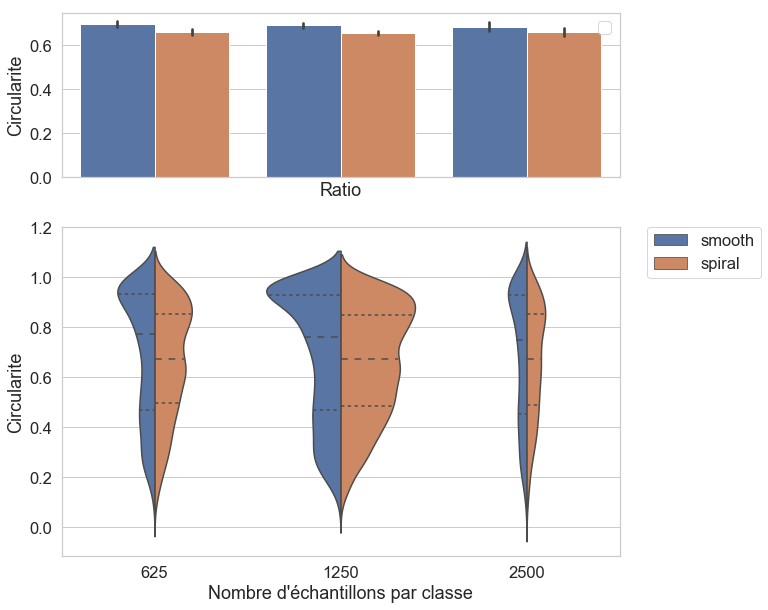

In [24]:
circularite = feature_samples(feature_vector,3)
display_efficiency(pd.DataFrame.from_dict({'Circularite':circularite[0],
                                           'Galaxy':circularite[1],
                                           'Sample':circularite[2]}),
                                           "Circularite")

#### 3.2 - Entrainement de l'arbre de décision et visualisation des résultats



In [27]:
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from matplotlib import colors

# Make plotly work in JupyterNotebook
init_notebook_mode(connected=True)

def train(feature_vector, y_label_encoded, max_depths, nb_folds):
    
    """
    Entraine l'arbre de décision et effectue une validation croisée
    de type stratified k fold pour chaque profondeur maximale spécifiée.
    
    Args:
        feature_vector:  Le vecteur contenant les primitives.
        y_label_encoded: Une liste contenant les classes des observation encodé avec le style "label"
        max_depths:      Une liste des profondeurs maximales de l'arbre.
        nb_folds:        Le nombre de folds à faire lors de la validation.    
    
    Returns:
        The tuple (cv_results_, best test accuracy, best max depth)
    """
    
    # Les profondeurs maximale a tester
    parameters = {"max_depth": max_depths}
    
    model = tree.DecisionTreeClassifier()
    
    # Stratégie de validation croisée : Stratified K Fold
    stratKFold = StratifiedKFold(n_splits=NB_FOLDS, shuffle=True)
    
    grid_search = GridSearchCV(
        model,
        parameters,
        return_train_score=True,
        cv=stratKFold,
        scoring=["precision", "accuracy", "f1"],
        refit="accuracy"
    )
    
    grid_search.fit(feature_vector, y_label_encoded)
    best_accuracy = grid_search.best_score_
    
    return (grid_search.cv_results_, best_accuracy, grid_search.best_params_['max_depth'])


def min_max_normalize(data):
    
    """
    Effectuez une normalisation min-max, qui normalise les données entre 0 et 1, 
    sur l'ensemble de données donné.
    
    Args:
        data: The dataset to normalize      
    Returns:
        The normalized dataset
    """
    data_min = min(data)
    data_max = max(data)
    diff = data_max-data_min
    return [(x-data_min)/(diff) for x in data]


def generate_colormap(data, colormap_name):
    
    """
    Générez une palette de couleurs à l'aide de matplotlib de manière à correspondre au jeu de données.
    
    Args:
        data:          The dataset for which the colormap is generated
        colormap_name: The name of the matplotlib colormap to use      
    Returns:
        The generated colormap
    """
    colormap = cm.get_cmap(colormap_name, len(data))
    norm_values = min_max_normalize(data)
    values_colors = []
    
    for value in norm_values:
        values_colors.append(colors.rgb2hex(colormap(value)))
    
    return values_colors

# TODO: Move the NB_FOLDS constant nearer to the constant for the number of loaded images
NB_FOLDS = 10

# Label encode les labels
labelEncoder = preprocessing.LabelEncoder()    
y_label_encoded = labelEncoder.fit_transform(Y)

# Génère des profondeur de 2 à 50
max_depths = [None, *range(2, 51)]

# Entrainement de l'arbre
results, best_accuracy, best_max_depth = train(feature_vector, y_label_encoded, max_depths, NB_FOLDS)

# Affichage des résultats de l'entrainement dans un tableau
columnLabels = [
    "max_depth=",
    "train_precision",
    "test_precision",
    "train_accuracy",
    "test_accuracy",
    "train_f1",
    "test_f1",
]
columnColormapNames = [
    "summer",
    "summer",
    "autumn",
    "autumn",
    "spring",
    "spring"
]
cellText = []
cellColors = ['#dcefe2']

# Les donnees de la premiere colone sont les max_depth
cellText.append([str(depth) for depth in max_depths])

# Format le texte des cellules du tableau et génère les couleurs des cellules
for i, col_label in enumerate(columnLabels[1:]):
    values = results["mean_" + col_label]
    formatedCellsText = ["{:.5f}".format(text) for text in values]
    cellText.append(formatedCellsText)
    cellColors.append(generate_colormap(values, columnColormapNames[i]))
    
data = [go.Table(
    columnwidth = [100],
    header=dict(
        values=columnLabels,
        fill=dict(color=['#a1d1b2', '#79d2d2', '#79d2d2', '#f9c386', '#f9c386', '#cbb6fc'])
    ),
    cells=dict(
        values=cellText,
        fill=dict(color=cellColors)
    )
)]

layout = go.Layout(
    title="Résultat de l'apprentissage et de la validation croisée",
    autosize=False,
    width=800,
    height=1225
)

figure = go.Figure(data=data, layout=layout)
iplot(figure)

print("Les cellules jaunes présentes les résultats les plus hauts.")
print("Meilleur test_accuracy = " + "{:.5f}".format(best_accuracy))
print("Profondeur maximale avec la meilleur test_accuracy = " + str(best_max_depth))


Les cellules jaunes présentes les résultats les plus hauts.
Meilleur test_accuracy = 0.85140
Profondeur maximale avec la meilleur test_accuracy = 5


## Question 4
<div style="text-align: justify">
Suite à l’implémentation de l’arbre de décision, celui-ci obtient une justesse d’environ 85 % sur l’ensemble de tests et d’environ 86,5 % sur l’ensemble d'entraînement. Ces résultats ont été obtenus lorsque la profondeur maximale de l’arbre est de 5. Cette différence de seulement 1,5 % entre les deux ensembles présente une faible variance. Ceci évoque le fait que l’arbre est cohérent dans ces prédictions même lorsque de nouvelles observations lui sont présentées. En d’autres termes, l’arbre n'apprend pas à reconnaître seulement que les particularités de l’ensemble d'entraînement; il a une bonne capacité de généralisation. D’ailleurs, cette faible variance est en partie due au fait que la validation et l’apprentissage ont été effectués à l’aide de 5 000 images. Parallèlement, puisque la validation a été effectuée en suivant la technique de validation croisée K-fold stratifiée sur 10 folds, cette faible variance peut être attendue en moyenne par cet arbre. C’est-à-dire que les résultats présentés plus tôt sont la moyenne des résultats de 10 modèles entraînés sur un ensemble de données différent. Ainsi, des résultats proches, qui varient peu de ceux présentés, peuvent être attendus lorsque l’arbre sera entraîné à nouveau. Toutefois, la justesse d’environ 85% et 86,5% sur les deux ensembles suggère que l’arbre à un biais non négligeable. Pour tout dire, la faible variance ainsi que ce biais dénotent le fait que l’arbre est en sous-apprentissage lorsque la profondeur maximale est de 5. Effectivement, le manque d’apprentissage de l’arbre l’empêche de classifier correctement 15 % des nouvelles observations qui lui sont présentés. Cependant, quand est-il de l’apprentissage de l’arbre lorsque la profondeur maximale est inférieure ou supérieure à 5?
<br><br>
À cet égard, lorsque la profondeur maximale est largement supérieure à 5, l’arbre tend à surapprendre. Ceci découle du fait que plus la profondeur augmente, plus la justesse sur l’ensemble d'entraînement augmente alors que la justesse sur l’ensemble de tests diminue. Ainsi, l’arbre apprend même les particularités les plus fines de l’ensemble d'entraînement, mais il ne parvient pas à généraliser ses apprentissages face à de nouvelles observations. Ceci indique que la variance augmente avec l’augmentation de la profondeur maximale. Inversement, lorsque la profondeur maximale diminue sous 5, l’arbre tend à sous-apprendre. Notamment, le biais de l’arbre augmente puisque la justesse sur l’ensemble d'entraînement et celui de tests diminue. Enfin, lorsque la valeur None est passée au paramètre max_depth, l’arbre est en surapprentissage comme si la profondeur maximale était très haute.</div>

## Question 5

<div style="text-align: justify">
La primitive de la hauteur sur la largeur de la galaxy aurait été intéressante a tester et implémenter. Parmis les primitives actuellement implémentées, l'excentricité de la galaxie prend en compte ce rapport en plus de la position du point focal de l'ellipse. Ainsi, lors du choix des primitives, une hypothèse à été relevée comme quoi que ce rapport serait redondant au côté de l'excentricité. Seulement, puisque cette hypothèse n’a pas été validée, la possibilité que ce rapport puisse contribuer au pouvoir discriminant des primitives actuelles reste présent.
</div>
<br>
<div style="text-align: justify">
La primitive de la spiralité tel que décrit par (Shamir, 2011) est une primitive qui aurait sûrement été d'une grande aide. En bref, la spiralité est mesurée à partir de l’image d’intensité radial de la galaxie. L’image d’intensité radiale affiche l’intensité radiale aux différentes distances du centre galactique (Shamir, 2011, p. 3). De ce fait, cette image permet de mieu distinguer les bras des galaxies en spirale. Par la suite, certaines transformations sont appliquées à l’image. Ces transformations permettent par la suite de calculer l’angle polaire par rapport à l’intensité radiale. Ensuite, cet angle est utilisé pour déterminer la spiralité de la galaxie. D’ailleur, en utilisant la spiralité et l'excentricité, Shamir à réussit à obtenir des résultats prometteur : « The experiment showed that ganalyzer was in agreement with the manual classification in ∼86% of the cases. » (Shamir, 2011, p. 10). Cette primitive est intéressante à intégrer puisqu’elle semble pouvoir améliorer la précision et la performance de l’arbre de décision.
</div>
<br>
<div style="text-align: justify">
La disconnectivité aurait aussi été une primitive intéressante à tester. Cette mesure utilise le concept de moment invariant tout comme la mesure de la centralité présenté à la question 2. Cependant, celle-ci concerne la composition d’une forme par une multitude d’autre formes : « The new measure depends on the number of shape components, the whole shape but also the shape of its components, on the relative size of the shape’s components and their mutual position. » (Žunić, Rosin et Ilić, 2018, p. 1). L’article Disconnectedness: A New Moment Invariant for Multi-Component Shapes présente l’utilisation de cette mesure entre autre pour la classification de galaxies. Par le fait même, les auteurs de cet article compare leurs résultats avec ceux de (Shamir, 2011) :
The images were manually classified by Shamir to provide a ground truth, although he notes that there are many in-between cases, and so the ground truth is not totally reliable. He achieves a classification accuracy of 88.76%. Using disconnectedness along with a variety of other standard shape measures we achieve almost the same result: a leave-one-out accuracy of 88.55%­
	(Žunić, Rosin et Ilić, 2018, p. 12)
Ainsi, cette primitive semble avoir un bon potentiel pour améliorer la précision de l'arbre de décision.
</div>

### Question 6 - Conclusion

<div style="text-align: justify">
En conclusion, en échange les résultats sont satisfaisants par rapport aux différentes primitives et prétraitements appliqués aux images. En effet, la justesse d'environ 85 % semble être une valeur très acceptable étant donné le peu de primitives impliqué et le temps permis pour la programmation du TP.
<br/><br/>
Pour résoudre le problème demandé dans les temps, une combinaison de prétraitements et de primitives de complexités différentes a été choisie. Nous avons ensuite séparé les différentes parties du rapport et de l'implémentation entre les membres de l'équipe. Ceci nous a amenés à avoir 3 prétraitements et 4 primitives. Nous avons au final utilisé un filtre gaussien, un crop au centre et un crop circulaire sur les images comme prétraitement. Les 4 primitives utilisées sont, la luminosité de l'image, le ratio de pixel rouge comparé au ratio de pixel bleu, l'excentricité et finalement la circularité des galaxies.
<br/><br/>
Les deux principales difficultés rencontrées se situent dans le calcul de la luminosité et l'organisation du code. En effet, par manque de temps le calcul de la luminosité est très basique et pourrait sûrement être grandement amélioré avec plus de lecture sur le sujet. De plus, l'organisation du code dans Notebook rend la programmation collaborative difficile avec des gestionnaires de version telle que GitHub étant donné que le format du fichier est dur à lire lorsqu'il est temps de rassembler les différentes branches.
</div>


### Bibliographie
<br>
<div style="text-align: justify">
Shamir, L. 2009. Automatic morphological classification of galaxy images. Laboratory of
Genetics of Baltimore 24p. <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2808694/pdf/nihms140565.pdf">https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2808694/pdf/nihms140565.pdf</a>
<br><br>
Gauthier, A., Jain, A., & Noordeh, E.S. 2016. Galaxy Morphology Classification. <a href="https://www.semanticscholar.org/paper/Galaxy-Morphology-Classification-Gauthier-Jain/7a97d305c83b2fb71268c9955c8ac742e8b92a51">https://www.semanticscholar.org/paper/Galaxy-Morphology-Classification-Gauthier-Jain/7a97d305c83b2fb71268c9955c8ac742e8b92a51</a>
<br><br>
Dhami, D.S. 2015. Morphological Classification of Galaxies into Spirals and Non-
Spirals. Indiana University. 82p. <a href="https://www.researchgate.net/publication/306215181_Morphological_classification_of_galaxies_into_spirals_and_non-spirals">https://www.researchgate.net/publication/306215181_Morphological_classification_of_galaxies_into_spirals_and_non-spirals</a>
<br><br>
F. Ferrari, R. R. de Carvalho, M. Trevisan. 2015. Morfometryka—A new way of establishing
morphological classification of galaxies. 15p. <a href="http://iopscience.iop.org/article/10.1088/0004-637X/814/1/55/pdf">http://iopscience.iop.org/article/10.1088/0004-637X/814/1/55/pdf</a>
<br><br>
Bell, E.F. & al. 2004. nearly 5000 distant early-type galaxies in COMBO-17: a red sequence and its evolution since z~1 <a href="https://iopscience.iop.org/article/10.1086/420778/pdf">https://iopscience.iop.org/article/10.1086/420778/pdf</a>
<br><br>
Žunić J., Hirota K. 2008 Measuring Shape Circularity. In: Ruiz-Shulcloper J., Kropatsch W.G. (eds) Progress in Pattern Recognition, Image Analysis and Applications. CIARP 2008. Lecture Notes in Computer Science, vol 5197. Springer, Berlin, Heidelberg <a href="https://link.springer.com/chapter/10.1007/978-3-540-85920-8_12">https://link.springer.com/chapter/10.1007/978-3-540-85920-8_12</a>
<br><br>
Shamir, L. 2011. Ganalyzer: A tool for automatic galaxy image analysis.<a href="https://arxiv.org/abs/1105.3214">https://arxiv.org/abs/1105.3214</a>
<br><br>
Žunić, J., Rosin, P. & Ilić, V. 2018. Disconnectedness: A New Moment Invariant for Multi-Component Shapes. Pattern Recognition. 78. 10.1016/j.patcog.2018.01.010. <a href="https://www.researchgate.net/publication/322541137_Disconnectedness_A_New_Moment_Invariant_for_Multi-Component_Shapes">https://www.researchgate.net/publication/322541137_Disconnectedness_A_New_Moment_Invariant_for_Multi-Component_Shapes</a>
</div>